In [1]:
# Install Kaggle CLI
!pip install -q kaggle

# Upload your Kaggle API token (kaggle.json)
from google.colab import files
files.upload()  # upload kaggle.json file here

# Move kaggle.json to the correct folder
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset from Kaggle
!kaggle datasets download -d tr1gg3rtrash/time-series-top-100-crypto-currency-dataset

# Unzip it
!unzip -q time-series-top-100-crypto-currency-dataset.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/tr1gg3rtrash/time-series-top-100-crypto-currency-dataset
License(s): CC0-1.0


In [4]:
import os
os.listdir()


['.config',
 'STMX-USD.csv',
 'SSX-USD.csv',
 'CCXX-USD.csv',
 'ETN-USD.csv',
 'LPT-USD.csv',
 'VUSDC-USD.csv',
 'LCX-USD.csv',
 'SAITAMA1-USD.csv',
 'XYM-USD.csv',
 'RSR-USD.csv',
 'PLA3-USD.csv',
 'BTRST-USD.csv',
 'AMPL-USD.csv',
 'EXRD-USD.csv',
 'KUNCI-USD.csv',
 'SUSD-USD.csv',
 'DG2-USD.csv',
 'ARPA-USD.csv',
 'RSV-USD.csv',
 'ONE1-USD.csv',
 'AVINOC-USD.csv',
 '1ECO-USD.csv',
 'RAY-USD.csv',
 'CON-USD.csv',
 'WVLX-USD.csv',
 'NKN-USD.csv',
 'SANTOS-USD.csv',
 'HUM-USD.csv',
 'MED-USD.csv',
 'kaggle.json',
 'ARDR-USD.csv',
 'RLY-USD.csv',
 'EURS-USD.csv',
 'YOUC-USD.csv',
 'SNL-USD.csv',
 'ORN-USD.csv',
 'MPL-USD.csv',
 'DAWN-USD.csv',
 'KAI-USD.csv',
 'ELA-USD.csv',
 'REEF-USD.csv',
 'RENBTC-USD.csv',
 'TWT-USD.csv',
 'XSGD-USD.csv',
 'CVC-USD.csv',
 'REP-USD.csv',
 'LOOKS-USD.csv',
 'ELF-USD.csv',
 'XNC-USD.csv',
 'BABYDOGE-USD.csv',
 'TRB-USD.csv',
 'HEDG-USD.csv',
 'TRU1-USD.csv',
 'TITAN-USD.csv',
 'DOGE-USD.csv',
 'TRAC-USD.csv',
 'UOS-USD.csv',
 'STARL-USD.csv',
 'CTK-USD

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [11]:
def analyze_crypto(file_name):
    df = pd.read_csv(file_name)
    print(f"\n🧾 Columns in {file_name}: {df.columns.tolist()}")

    # Fix timestamp column
    if 'timestamp' not in df.columns:
        print(f"⚠️ Skipping {file_name} - 'timestamp' column missing.")
        return

    df['Date'] = pd.to_datetime(df['timestamp'])  # Convert timestamp to datetime
    df = df.sort_values(by='Date')

    # Clean numeric columns
    price_cols = ['open', 'high', 'low', 'close', 'volume']
    for col in price_cols:
        if col in df.columns:
            df[col] = df[col].replace({',': '', '-': None}, regex=True).astype(float)

    # Moving averages
    df['MA7'] = df['close'].rolling(window=7).mean()
    df['MA30'] = df['close'].rolling(window=30).mean()

    # Trend logic
    df['Trend'] = ['Bullish' if ma7 > ma30 else 'Bearish' for ma7, ma30 in zip(df['MA7'], df['MA30'])]

    # Print trend summary
    print(f"\n📊 {file_name.replace('-USD.csv','')} Trend Summary:")
    print(df['Trend'].value_counts())

    # Plotting
    plt.figure(figsize=(12, 5))
    plt.plot(df['Date'], df['close'], label='Close Price', color='blue', alpha=0.7)
    plt.plot(df['Date'], df['MA7'], label='7-Day MA', color='orange')
    plt.plot(df['Date'], df['MA30'], label='30-Day MA', color='green')
    plt.title(f"{file_name.replace('-USD.csv','')} Price Trend")
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



🧾 Columns in DUSK-USD.csv: ['timestamp', 'adjclose', 'low', 'volume', 'close', 'high', 'open']

📊 DUSK Trend Summary:
Trend
Bearish    651
Bullish    525
Name: count, dtype: int64


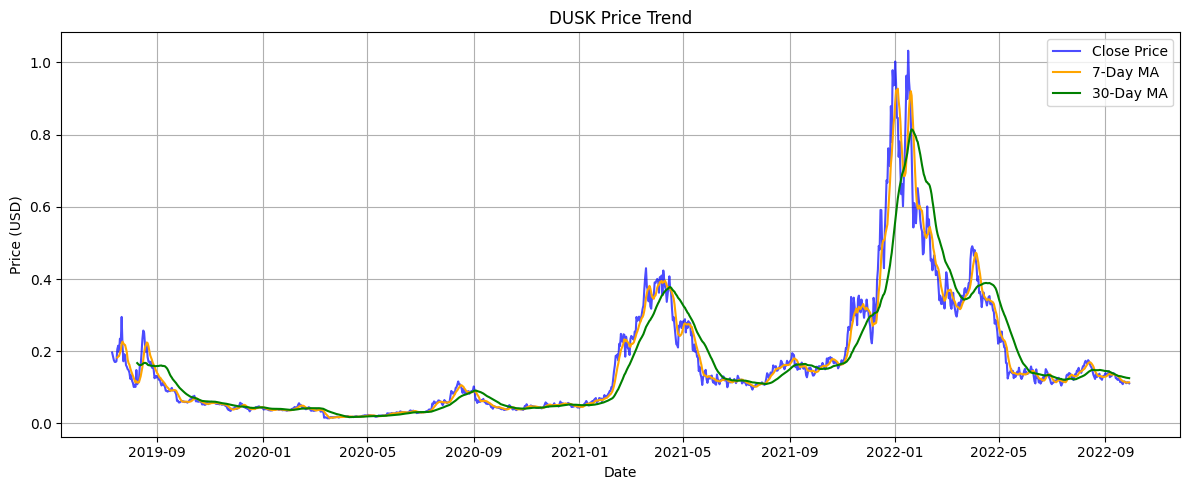


🧾 Columns in BICO-USD.csv: ['timestamp', 'adjclose', 'low', 'open', 'volume', 'close', 'high']

📊 BICO Trend Summary:
Trend
Bearish    241
Bullish     61
Name: count, dtype: int64


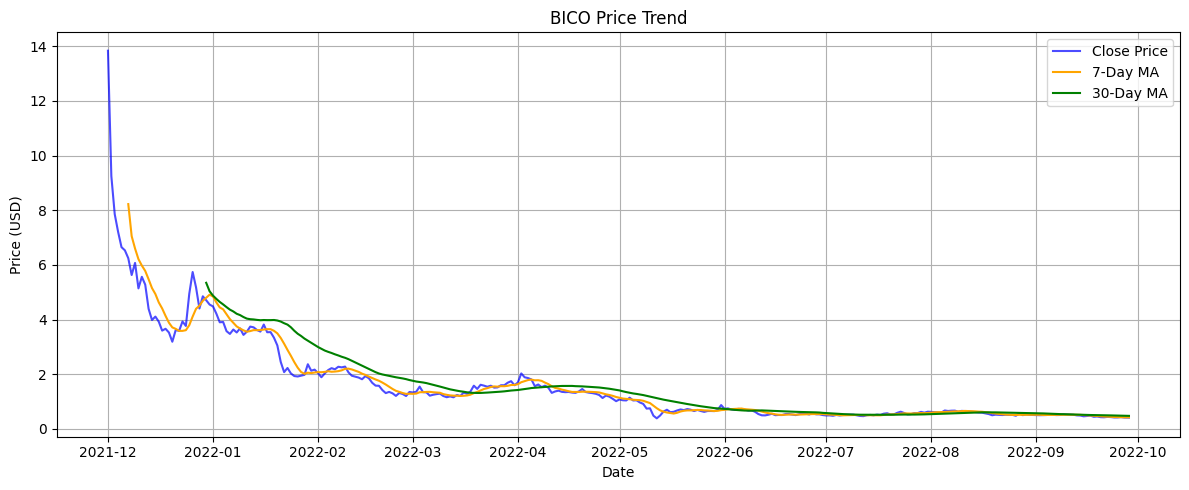


🧾 Columns in BNB-USD.csv: ['timestamp', 'adjclose', 'open', 'low', 'high', 'volume', 'close']

📊 BNB Trend Summary:
Trend
Bullish    966
Bearish    819
Name: count, dtype: int64


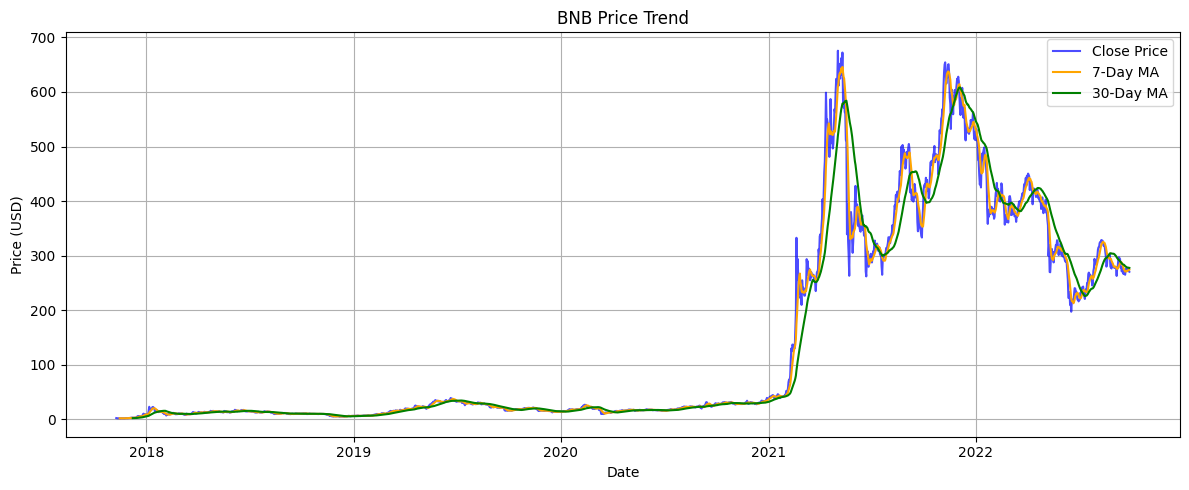


🧾 Columns in FET-USD.csv: ['timestamp', 'adjclose', 'close', 'high', 'volume', 'open', 'low']

📊 FET Trend Summary:
Trend
Bearish    735
Bullish    572
Name: count, dtype: int64


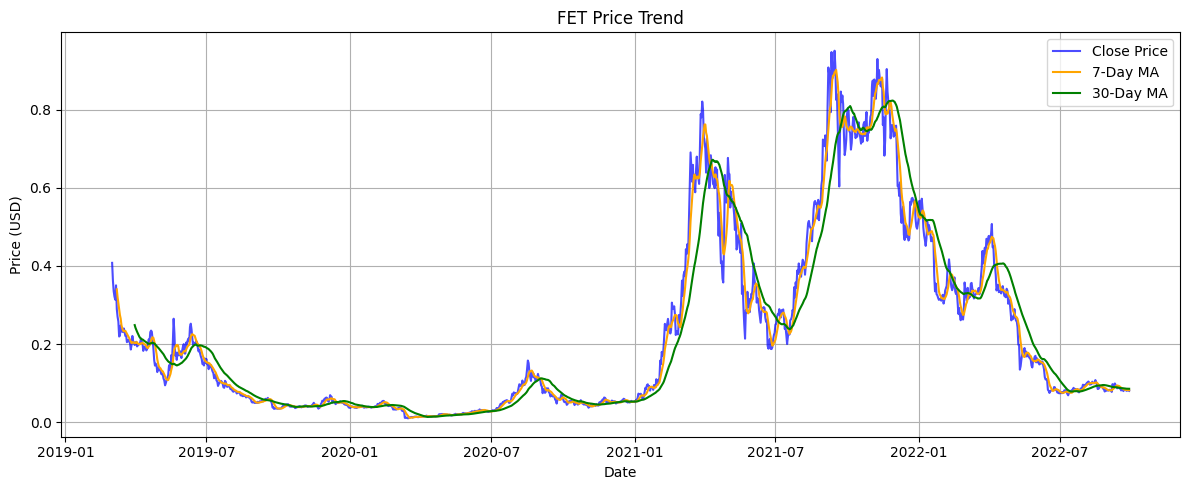


🧾 Columns in GALA-USD.csv: ['timestamp', 'adjclose', 'high', 'volume', 'open', 'low', 'close']

📊 GALA Trend Summary:
Trend
Bearish    466
Bullish    275
Name: count, dtype: int64


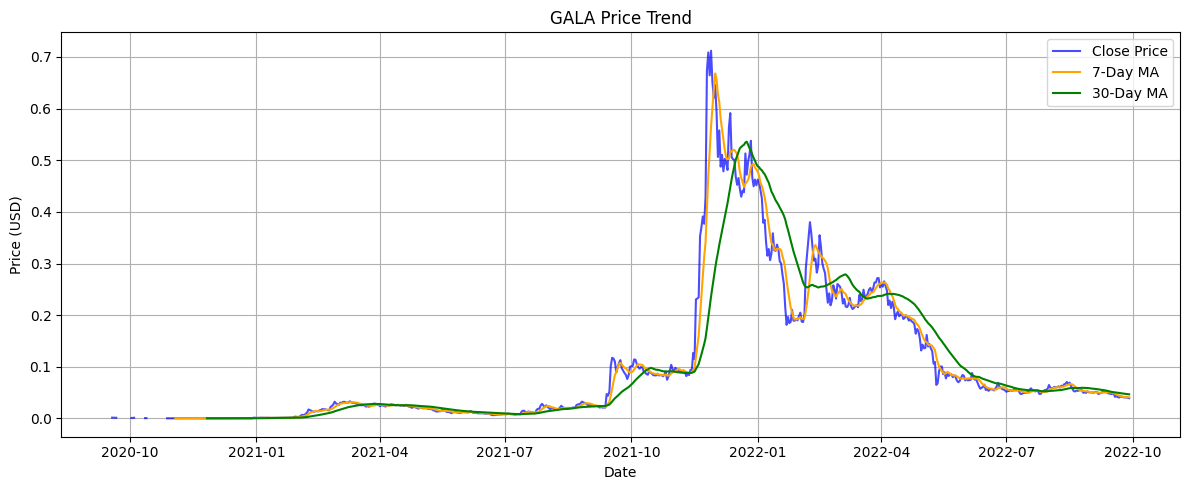


🧾 Columns in VRA-USD.csv: ['timestamp', 'adjclose', 'volume', 'open', 'high', 'low', 'close']

📊 VRA Trend Summary:
Trend
Bearish    771
Bullish    504
Name: count, dtype: int64


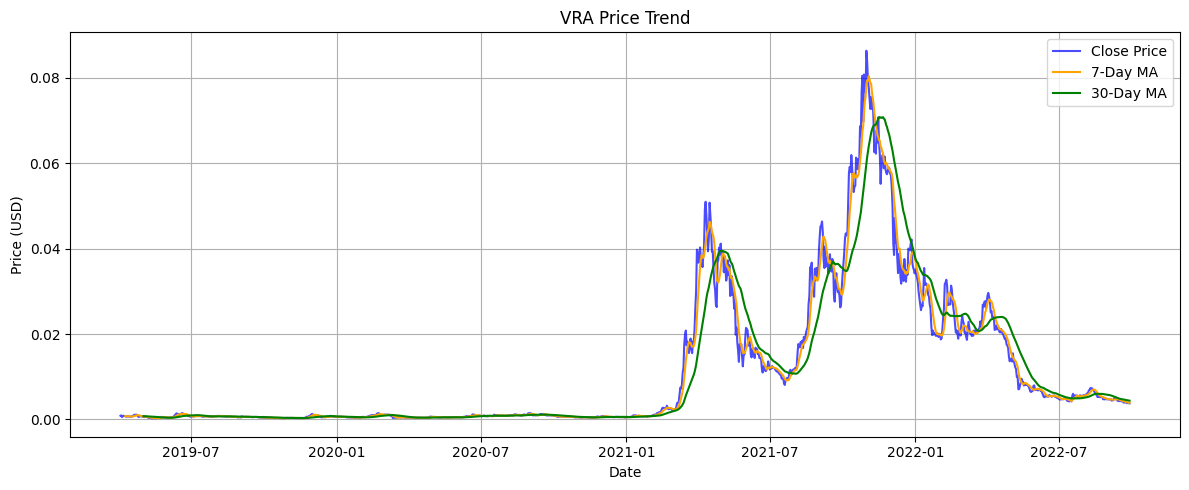


🧾 Columns in BAKE-USD.csv: ['timestamp', 'adjclose', 'open', 'low', 'volume', 'high', 'close']

📊 BAKE Trend Summary:
Trend
Bearish    435
Bullish    300
Name: count, dtype: int64


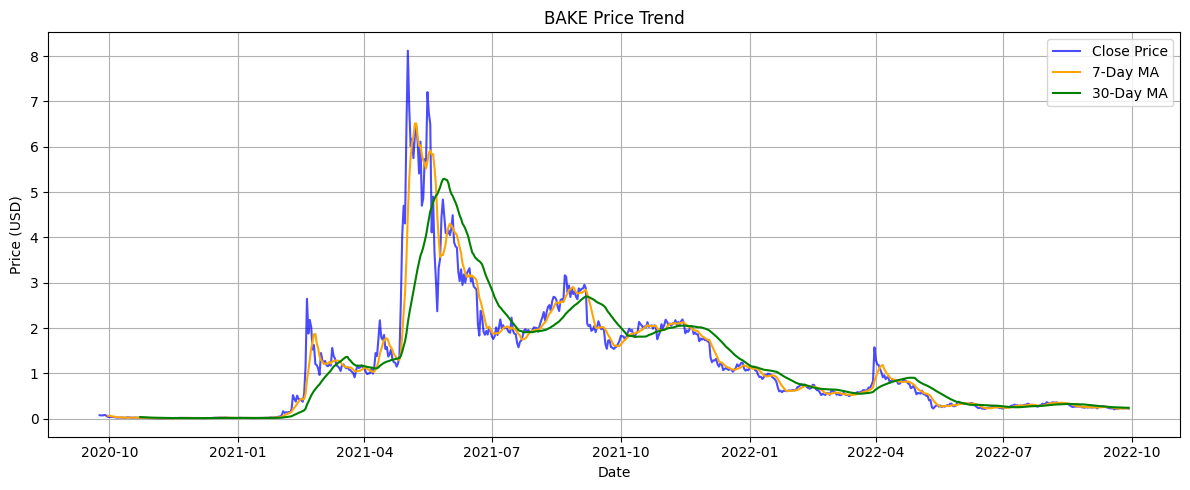


🧾 Columns in ICX-USD.csv: ['timestamp', 'adjclose', 'high', 'volume', 'open', 'low', 'close']

📊 ICX Trend Summary:
Trend
Bearish    1013
Bullish     772
Name: count, dtype: int64


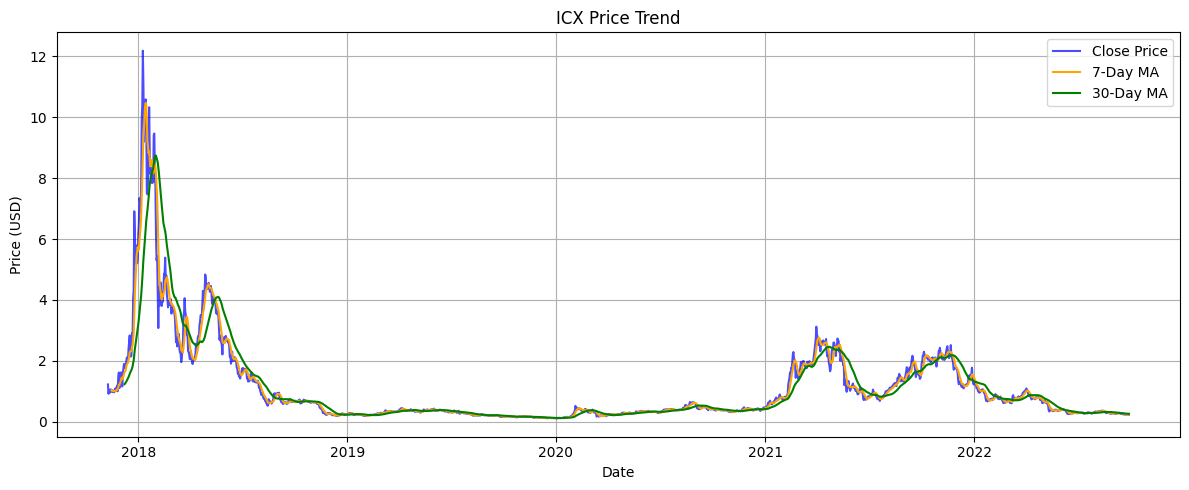

In [14]:
# List of crypto CSV files you want to analyze
crypto_files = [  'DUSK-USD.csv','BICO-USD.csv','BNB-USD.csv', 'FET-USD.csv', 'GALA-USD.csv', 'VRA-USD.csv', 'BAKE-USD.csv','ICX-USD.csv']

# Loop through each and analyze
for file in crypto_files:
    if os.path.exists(file):
        analyze_crypto(file)
    else:
        print(f"⚠️ File not found: {file}")
